In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

# Selecting the relevant data

vibe_col = [1,2,3]
healthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned/OneKhz2023-03-24t0*.csv'
healthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/horizontal-cleaned/OneKhz2023-03-24t0*.csv'
unhealthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/vertical-cleaned/OneKhz2023-03-23t0*.csv'
unhealthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/unhealthy/loose-base/first-batch-22-3-2023/vibration/horizontal-cleaned/OneKhz2023-03-23t0*.csv'

# Loading the data
def dataReader(datapath):
    data_n = pd.DataFrame()
    for file in glob.glob(datapath):
        df = pd.read_csv(file, usecols=['x', 'y', 'z'])

        data_n = pd.concat([data_n, df], axis=0)
        print("done with file: " + file)

    return data_n

data_healthy_vert = dataReader(healthy_vert)
data_healthy_hori = dataReader(healthy_hori)
data_unhealthy_vert = dataReader(unhealthy_vert)
data_unhealthy_hori = dataReader(unhealthy_hori)

print("starting size: ")
print(data_healthy_vert.shape)
print(data_healthy_hori.shape)
print(data_unhealthy_vert.shape)
print(data_unhealthy_hori.shape)


done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-24t00-00-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-24t00-30-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-24t01-00-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-24t01-30-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-24t02-00-00.csv
done with file: C:/Users/jared/OneDrive - National

In [4]:
unseen_healthy_vert = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned/OneKhz2023-03-23t*.csv'
unseen_healthy_hori = 'C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/horizontal-cleaned/OneKhz2023-03-23t*.csv'

data_unseen_healthy_vert = dataReader(unseen_healthy_vert)
data_unseen_healthy_hori = dataReader(unseen_healthy_hori)

done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-23t20-30-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-23t21-00-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-23t21-30-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-23t22-00-00.csv
done with file: C:/Users/jared/OneDrive - National University of Singapore/Y2/S2/EG3301R/DataCollection/healthy/second-batch-27-3-2023-cleaned/vertical-cleaned\OneKhz2023-03-23t22-30-00.csv
done with file: C:/Users/jared/OneDrive - National

In [5]:
print(data_unseen_healthy_vert.shape)
print(data_unseen_healthy_hori.shape)

data_unseen_healthy_vert_cut = data_unseen_healthy_vert[:1737000]
data_unseen_healthy_hori_cut = data_unseen_healthy_hori[:1737000]

print(data_unseen_healthy_vert_cut.shape)
print(data_unseen_healthy_hori_cut.shape)

(1738612, 3)
(1737760, 3)
(1737000, 3)
(1737000, 3)


In [6]:
# Cut all data to 250000 rows
data_healthy_vert_cut = data_healthy_vert[:4900000]
data_healthy_hori_cut = data_healthy_hori[:4900000]
data_unhealthy_vert_cut = data_unhealthy_vert[:4900000]
data_unhealthy_hori_cut = data_unhealthy_hori[:4900000]


print("Cut size: ")
print(data_healthy_vert_cut.shape)
print(data_healthy_hori_cut.shape)
print(data_unhealthy_vert_cut.shape)
print(data_unhealthy_hori_cut.shape)


Cut size: 
(4900000, 3)
(4900000, 3)
(4900000, 3)
(4900000, 3)


In [7]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data_healthy_vert_array = []
data_healthy_hori_array = []
data_unhealthy_vert_array = []
data_unhealthy_hori_array = []

def dataToArray(data):
    signalX = data.iloc[:, 0]
    signalY = data.iloc[:, 1]
    signalZ = data.iloc[:, 2]
    signal = np.array([signalX, signalY, signalZ])
    return signal

data_healthy_vert_array = np.array(dataToArray(data_healthy_vert_cut))
data_healthy_hori_array = np.array(dataToArray(data_healthy_hori_cut))
data_unhealthy_vert_array = np.array(dataToArray(data_unhealthy_vert_cut))
data_unhealthy_hori_array = np.array(dataToArray(data_unhealthy_hori_cut))

print(data_healthy_vert_array.shape)

(3, 4900000)


In [8]:
# check for nan and print the index
def checkForNan(array):
    for i in range(len(array)):
        for j in range(len(array[i])):
            if np.isnan(array[i][j]):
                print("nan found at index: " + str(i) + " " + str(j))
                      

checkForNan(data_healthy_vert_array)
checkForNan(data_healthy_hori_array)
checkForNan(data_unhealthy_vert_array)
checkForNan(data_unhealthy_hori_array)

In [9]:
# Step 1a: Preprocess the data

duration = 100

def reshapeArray(array, duration):
    samples = int(array.shape[1] / duration)
    return array.reshape(3, samples, duration)

def normalize_segments(data):
    num_samples = data.shape[1]
    MinMax = MinMaxScaler(feature_range=(0, 1))
    # scaler = StandardScaler()
    # scaler = RobustScaler()
    
    for i in range(num_samples):
        data[:, i, :] = MinMax.fit_transform(data[:, i, :].T).T

    return data
    
data_healthy_vert_reshaped = reshapeArray(data_healthy_vert_array, duration)
data_healthy_hori_reshaped = reshapeArray(data_healthy_hori_array, duration)
data_unhealthy_vert_reshaped = reshapeArray(data_unhealthy_vert_array, duration)
data_unhealthy_hori_reshaped = reshapeArray(data_unhealthy_hori_array, duration)    


# Preprocess and normalize each segment individually
data_healthy_vert_normalised = normalize_segments(data_healthy_vert_reshaped)
data_healthy_hori_normalised = normalize_segments(data_healthy_hori_reshaped)
data_unhealthy_vert_normalised = normalize_segments(data_unhealthy_vert_reshaped)
data_unhealthy_hori_normalised = normalize_segments(data_unhealthy_hori_reshaped)

    
#plot graph for normal data before and after scaling
# Plot training & validation loss values

In [10]:
print("Reshaped size: ", data_healthy_vert_reshaped.shape)
print("Normalized size: ", data_healthy_vert_normalised.shape)

Reshaped size:  (3, 49000, 100)
Normalized size:  (3, 49000, 100)


In [11]:
data_unseen_healthy_vert_array = dataToArray(data_unseen_healthy_vert_cut)
checkForNan(data_unseen_healthy_vert_array)
data_unseen_healthy_vert_reshaped = reshapeArray(data_unseen_healthy_vert_array, duration)
data_unseen_healthy_vert_normalised = normalize_segments(data_unseen_healthy_vert_reshaped)

data_unseen_healthy_hori_array = dataToArray(data_unseen_healthy_hori_cut)
checkForNan(data_unseen_healthy_hori_array)
data_unseen_healthy_hori_reshaped = reshapeArray(data_unseen_healthy_hori_array, duration)
data_unseen_healthy_hori_normalised = normalize_segments(data_unseen_healthy_hori_reshaped)


(3, 49000, 100)
[[[0.4874552  0.34946237 0.55734767 ... 0.21684588 0.24910394 0.60035842]
  [0.50693069 0.64950495 0.78019802 ... 0.70693069 0.71485149 0.96831683]
  [0.68863955 0.67461431 0.3997195  ... 0.82889201 0.62692847 0.83029453]
  ...
  [0.19848771 0.49905482 0.58223062 ... 0.56521739 0.48204159 0.61436673]
  [0.71400394 0.46351085 0.56607495 ... 0.77514793 0.68639053 0.72978304]
  [0.70166667 0.38       0.60833333 ... 0.74       0.80333333 0.31833333]]

 [[0.11197917 0.53841146 0.42903646 ... 0.42903646 0.53776042 0.05729167]
  [0.43562978 0.44119694 0.07654836 ... 0.87195546 0.64370216 0.67919276]
  [0.82431483 0.55938159 0.72663387 ... 0.23260717 0.71539002 0.48910752]
  ...
  [0.43159486 0.04837491 0.51322751 ... 0.33408919 0.52456538 0.47770219]
  [0.33705773 0.54065798 0.28615767 ... 0.61080074 0.86405959 0.64183737]
  [0.73482205 0.67201675 0.43475227 ... 0.60781577 0.35799023 0.65247732]]

 [[0.         0.70469799 0.58612975 ... 0.96644295 0.73378076 0.2885906 ]
  [0.0

C:\Users\jared\AppData\Local\Temp\ipykernel_25956\2775148304.py:124: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jared\AppData\Local\Temp\ipykernel_25956\2775148304.py:138: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jared\AppData\Local\Temp\ipykernel_25956\2775148304.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\jared\AppData\Local\Temp\ipykernel_25956\2775148304.py:164: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


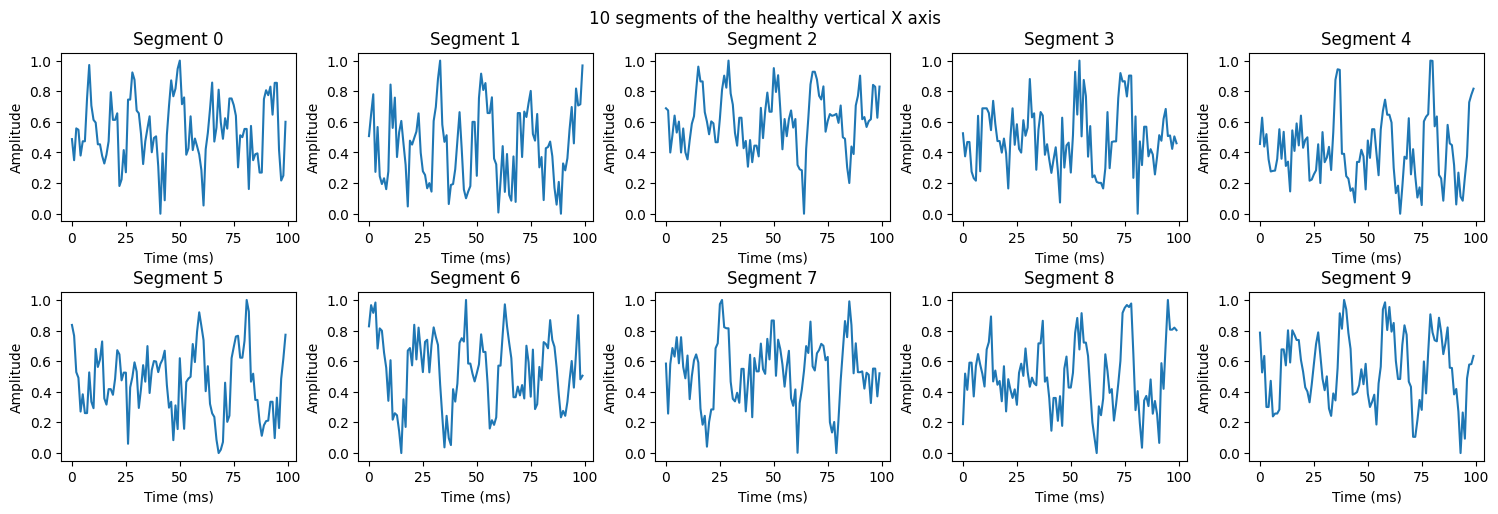

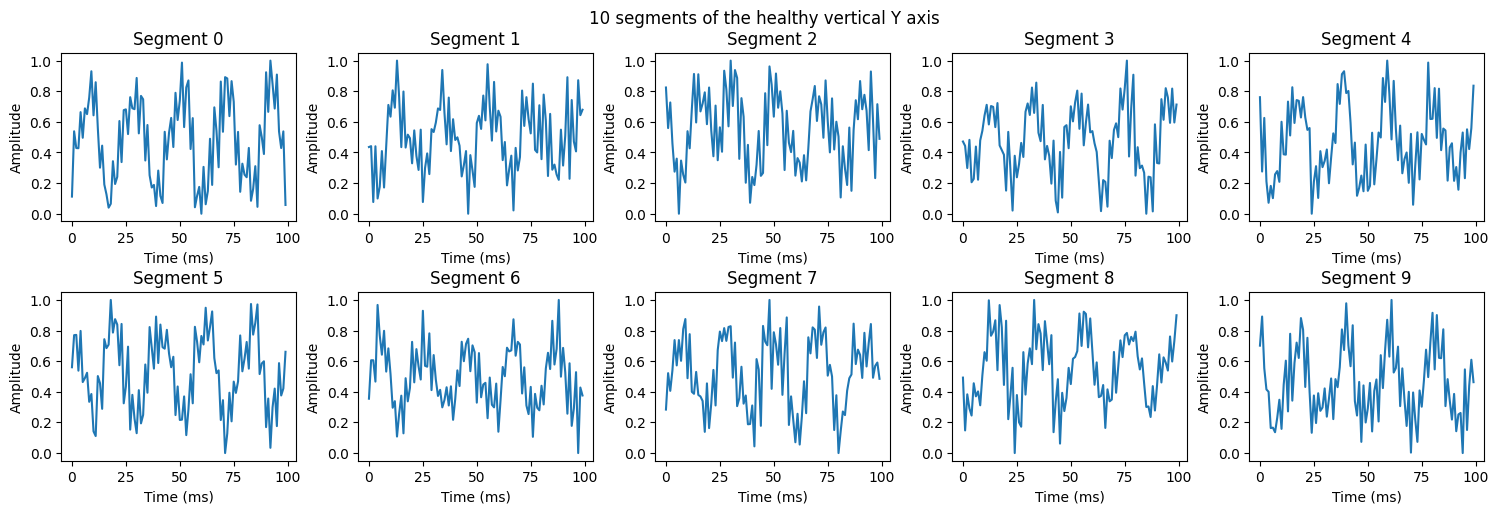

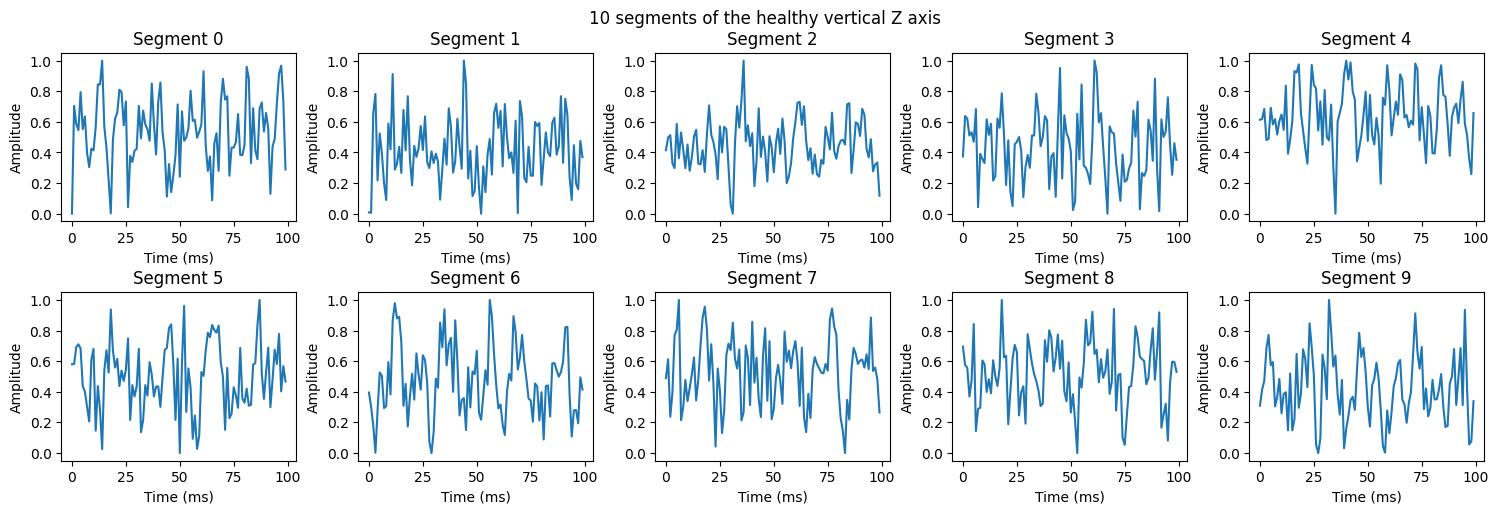

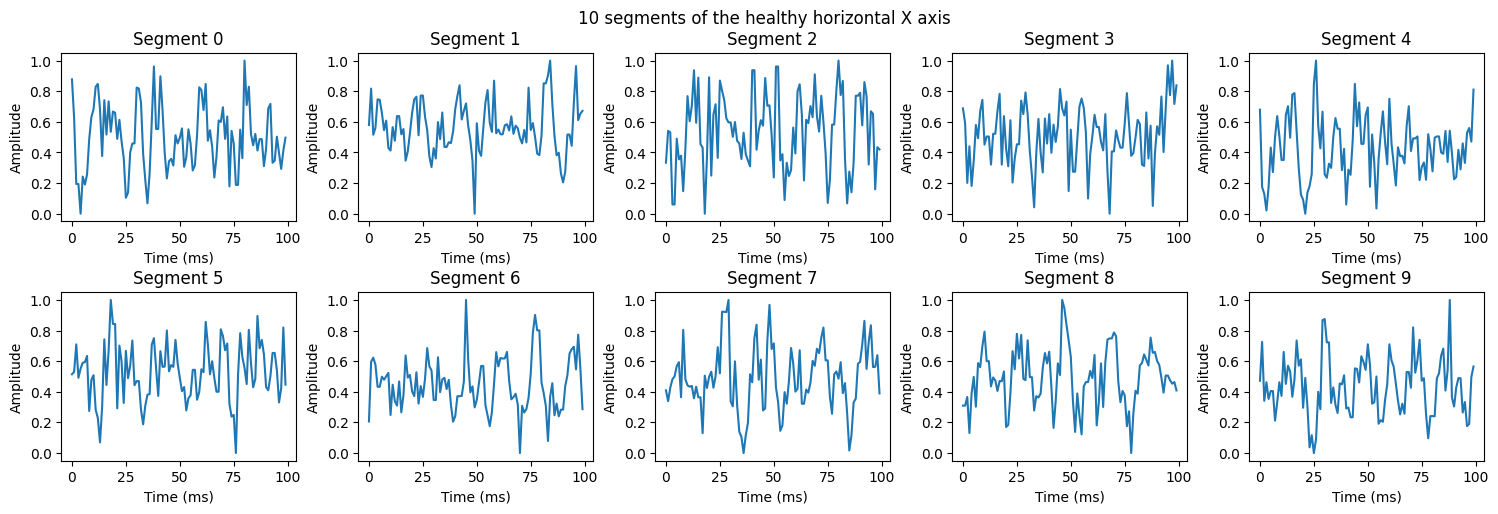

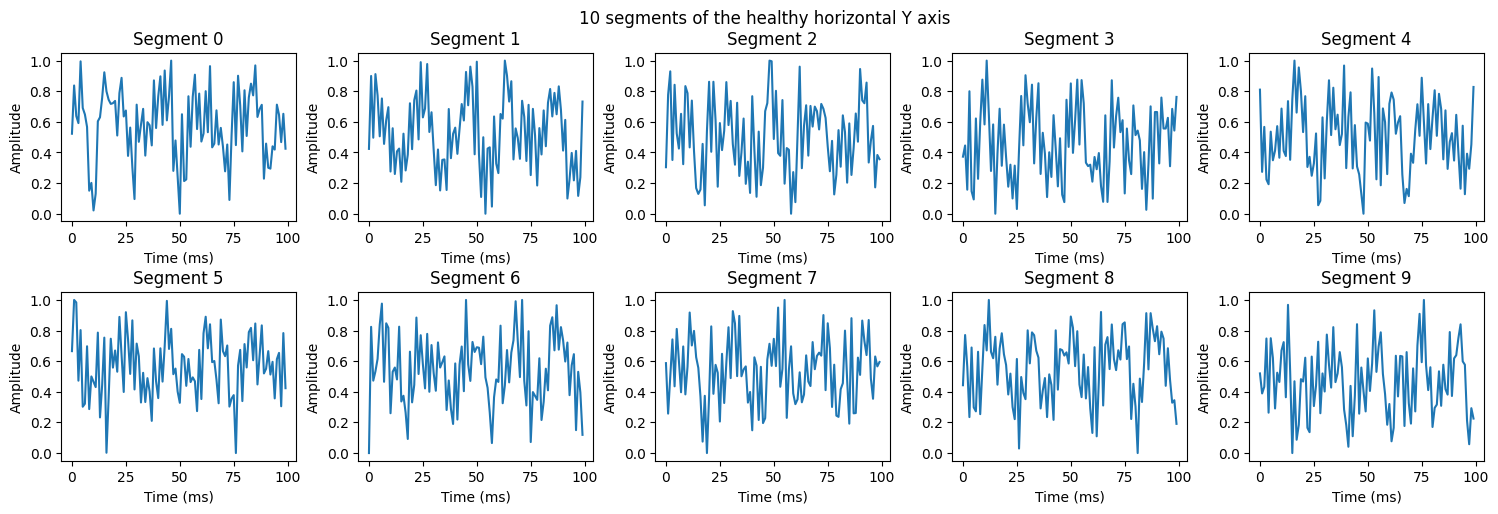

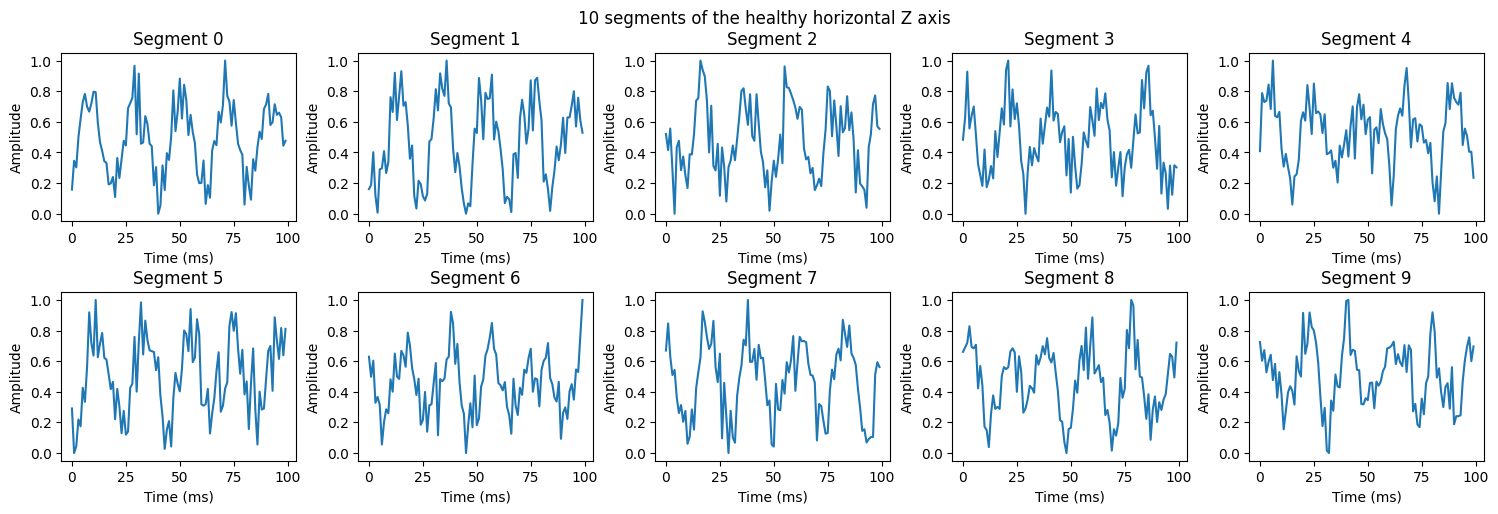

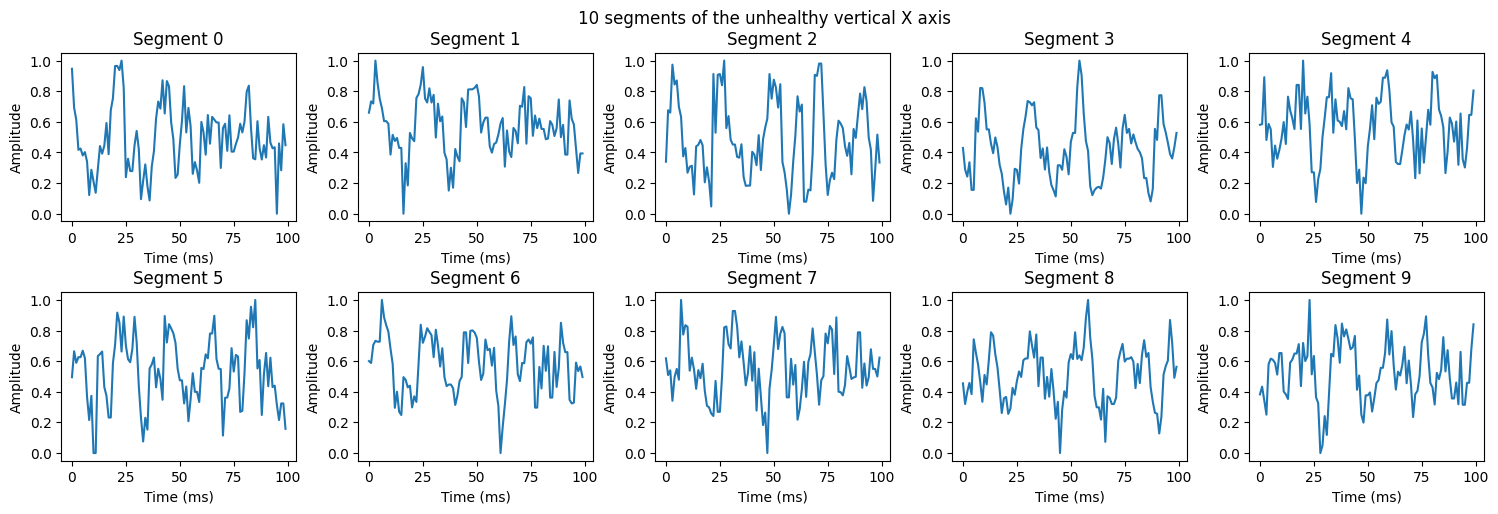

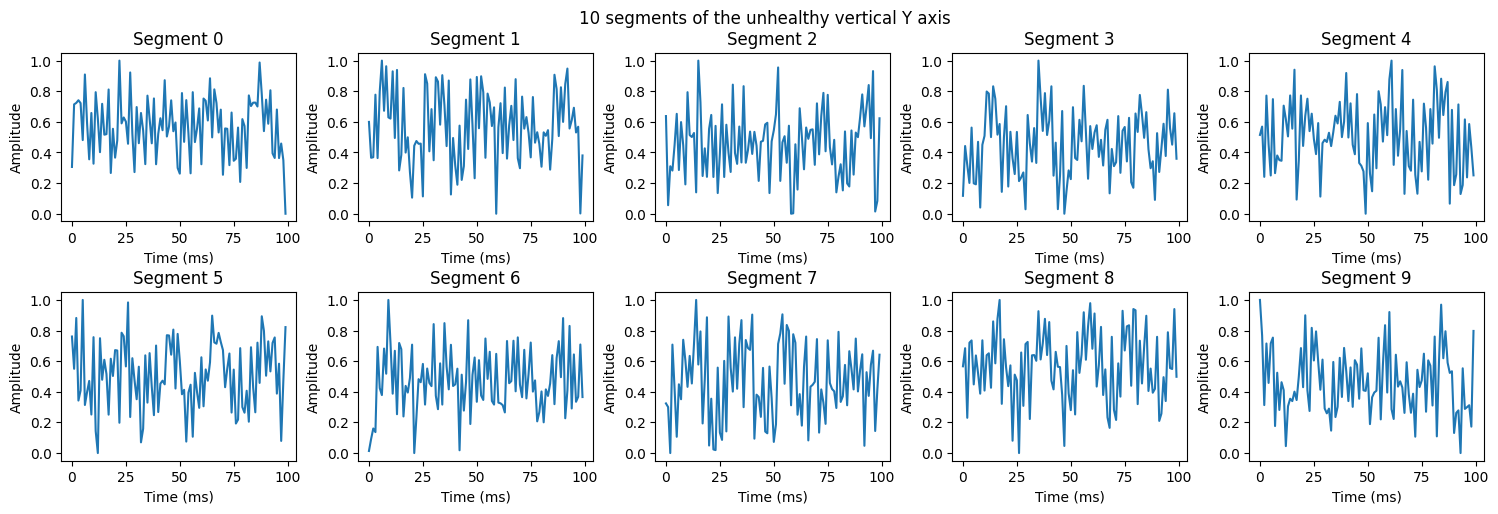

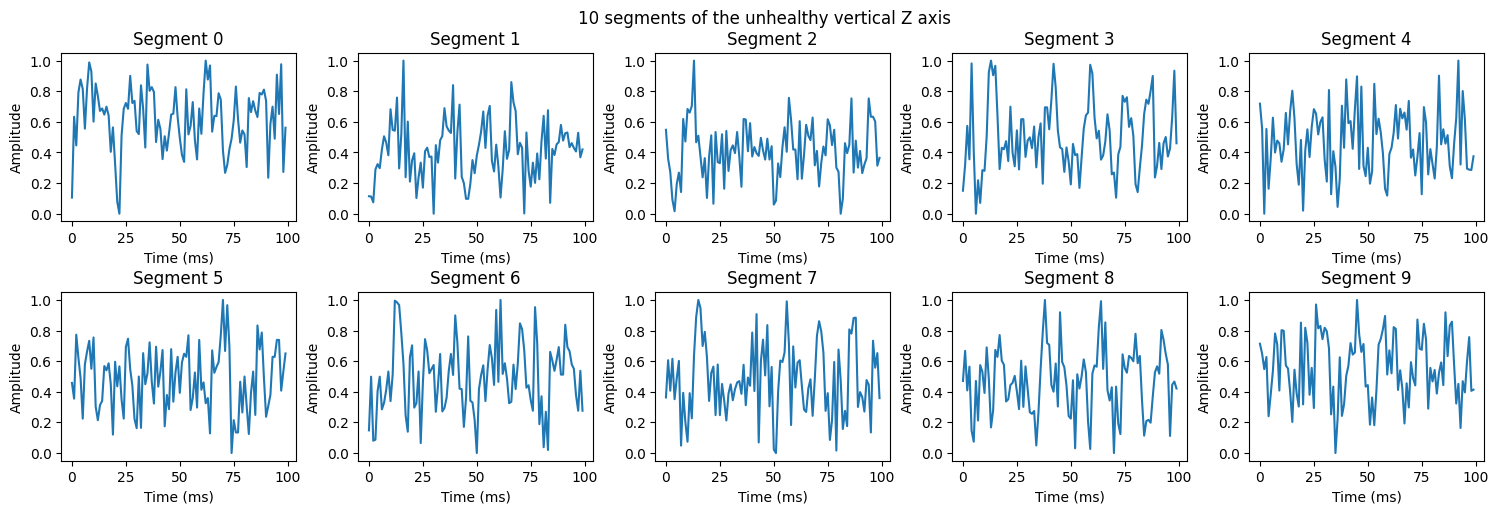

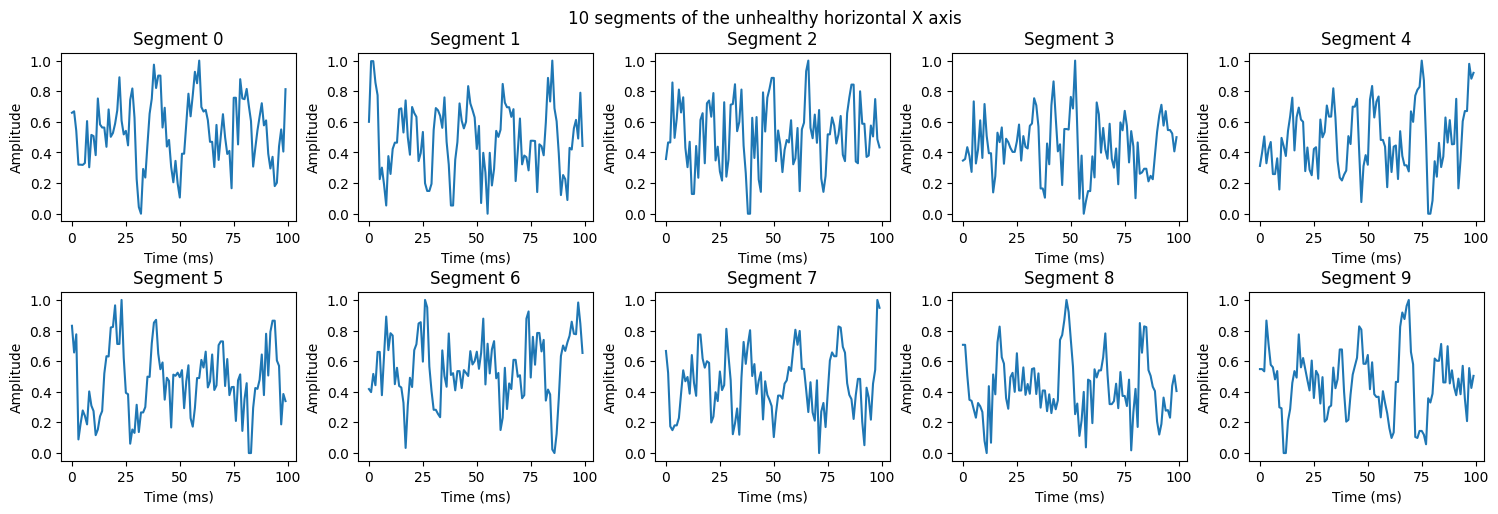

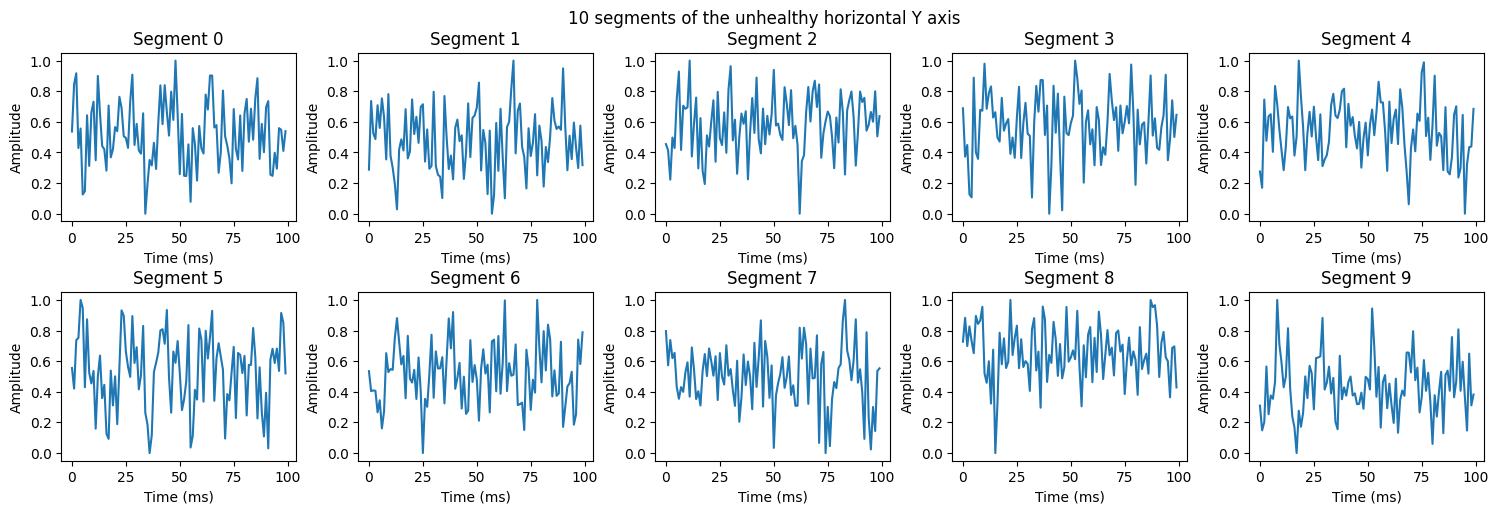

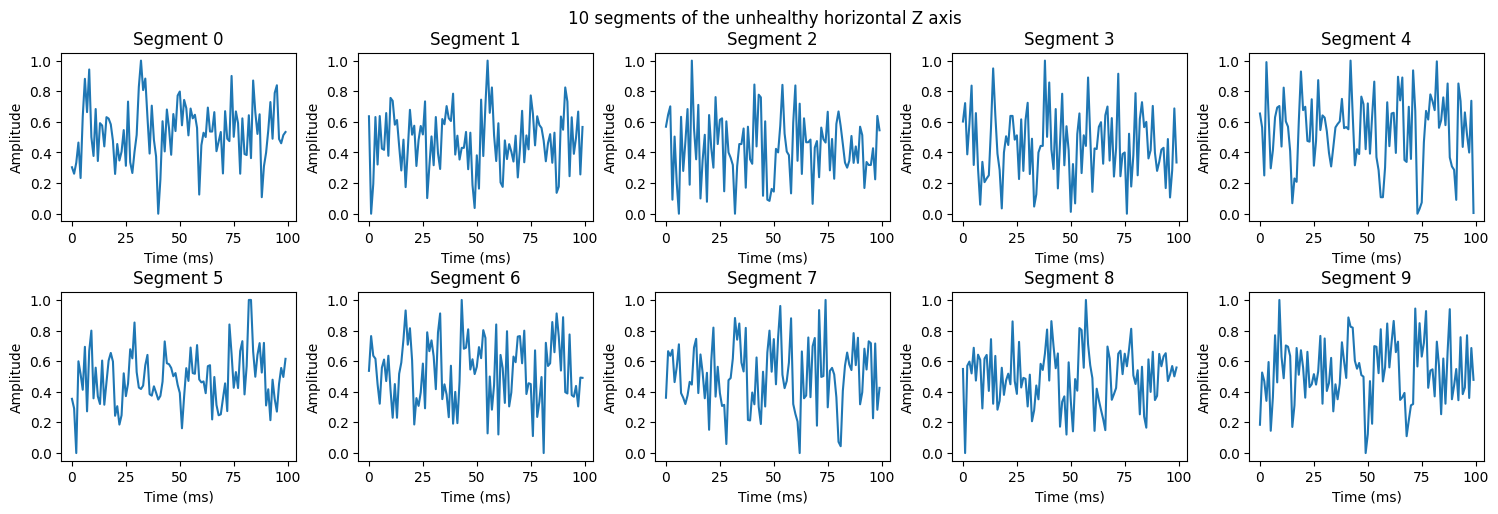

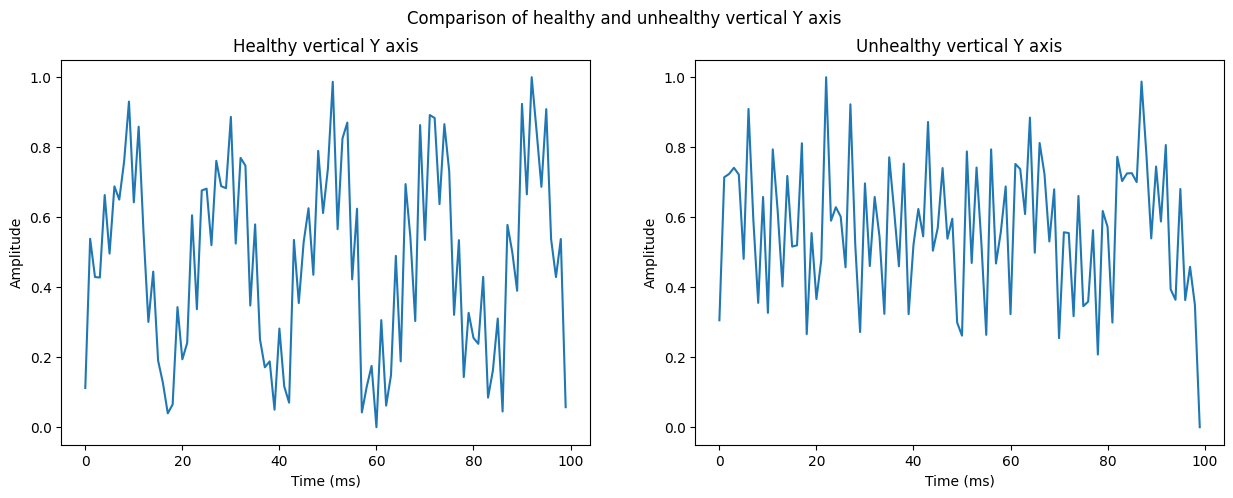

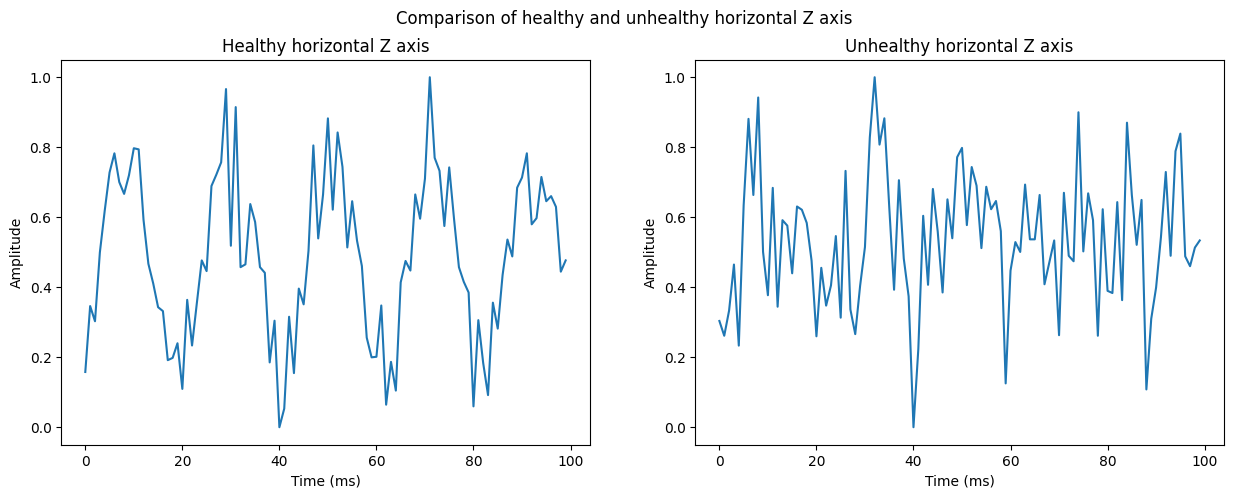

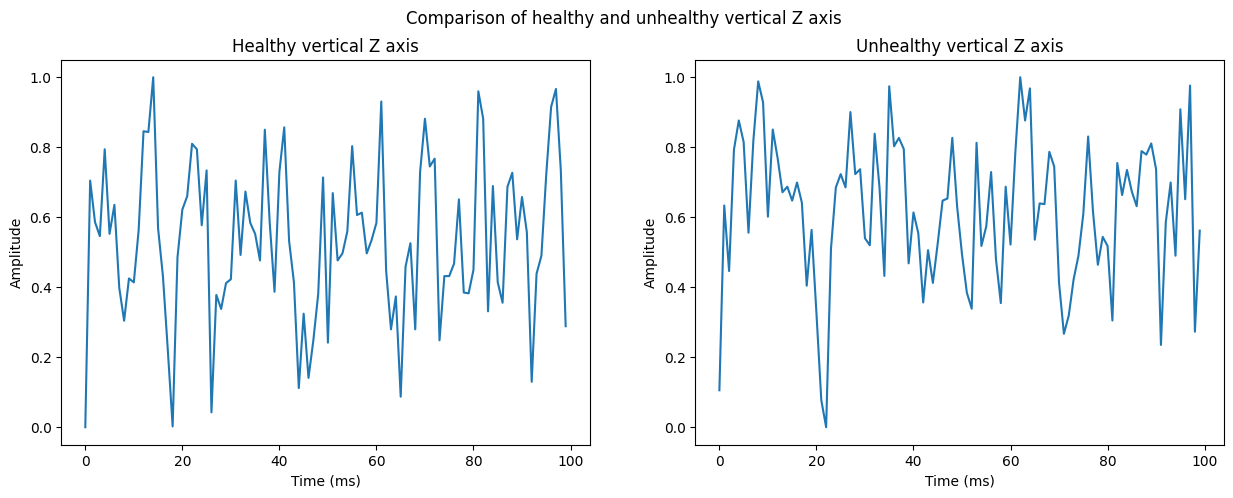

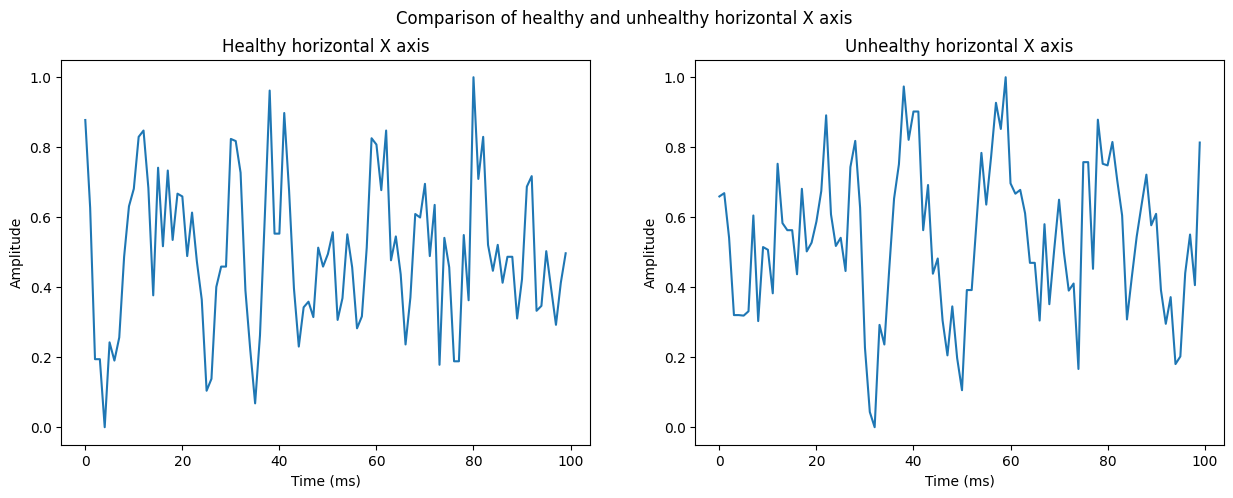

In [12]:
#visualize all the data here
print(data_healthy_vert_normalised.shape)

print(data_healthy_vert_normalised)

def plot_10_segments(data, title, duration, axis):
    time = np.arange(0, duration, duration/data.shape[2])
    
    if (axis == "X"):
        data = data[0]
    elif (axis == "Y"):
        data = data[1]
    elif (axis == "Z"):
        data = data[2]
    else:
        print("Invalid axis, must be X, Y or Z")
        return
    
    fig, axs = plt.subplots(2, 5, figsize=(15, 5))
    
    fig.suptitle("10 segments of the " + title + " " + axis + " axis")
    fig.tight_layout(h_pad=3.0)
    
    for i in range(2):
        for j in range(5):
            axs[i, j].plot(time, data[i*5 + j])
            axs[i, j].set_title('Segment {}'.format(i*5 + j))
            axs[i, j].set_xlabel('Time (ms)')
            axs[i, j].set_ylabel('Amplitude')
    

def plot_axes(data, segment_index, duration, title):
    if segment_index < 0 or segment_index >= data.shape[1]:
        raise ValueError("Invalid segment_index, must be in range [0, {})".format(data.shape[1]))
    
    time = np.arange(0, duration, duration/data.shape[2])
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle('Segment {}'.format(segment_index)  + " " + title)
    
    ax1.plot(time, data[0, segment_index, :])
    ax1.set_title('X-axis')
    ax1.set_xlabel('Time (ms)')
    ax1.set_ylabel('Amplitude')

    ax2.plot(time, data[1, segment_index, :])
    ax2.set_title('Y-axis')
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Amplitude')

    ax3.plot(time, data[2, segment_index, :])
    ax3.set_title('Z-axis')
    ax3.set_xlabel('Time (ms)')
    ax3.set_ylabel('Amplitude')

    plt.show()


#plot the healthy data for vertical and horizontal
# plot_axes(data_healthy_vert_normalised, 3, duration, "healthy vertical")
# plot_axes(data_unhealthy_vert_normalised, 3, duration, "unhealthy vertical")




# #plot the unhealthy data for vertical and horizontal
# plot_axes(data_healthy_hori_normalised, 3, duration, "healthy horizontal")
# plot_axes(data_unhealthy_hori_normalised, 3, duration, "unhealthy horizontal")



#plot the data for healthy X axis vertical
plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "X")


#plot the data for healthy Y axis vertical
plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "Y")

#plot the data for healthy Z axis vertical
plot_10_segments(data_healthy_vert_normalised, "healthy vertical", duration, "Z")


#plot the data for healthy X axis horizontal
plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "X")


#plot the data for healthy Y axis horizontal
plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "Y")

#plot the data for healthy Z axis horizontal
plot_10_segments(data_healthy_hori_normalised, "healthy horizontal", duration, "Z")

#plot the data for unhealthy X axis vertical
plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "X")

#plot the data for unhealthy Y axis vertical
plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "Y")

#plot the data for unhealthy Z axis vertical
plot_10_segments(data_unhealthy_vert_normalised, "unhealthy vertical", duration, "Z")

#plot the data for unhealthy X axis horizontal
plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "X")

#plot the data for unhealthy Y axis horizontal
plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "Y")

#plot the data for unhealthy Z axis horizontal
plot_10_segments(data_unhealthy_hori_normalised, "unhealthy horizontal", duration, "Z")



#plot one segment of healthy vertical Y axis vs unhealthy vertical Y axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(data_healthy_vert_normalised[1, 0, :])
ax1.set_title('Healthy vertical Y axis')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (ms)')
ax2.plot(data_unhealthy_vert_normalised[1, 0, :])
ax2.set_title('Unhealthy vertical Y axis')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time (ms)')
fig.suptitle('Comparison of healthy and unhealthy vertical Y axis')
fig.show()


#plot one segment of healthy horizontal Z axis vs unhealthy horizontal Z axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(data_healthy_hori_normalised[2, 0, :])
ax1.set_title('Healthy horizontal Z axis')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (ms)')
ax2.plot(data_unhealthy_hori_normalised[2, 0, :])
ax2.set_title('Unhealthy horizontal Z axis')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time (ms)')
fig.suptitle('Comparison of healthy and unhealthy horizontal Z axis')
fig.show()

#plot one segment of healthy vertical Z axis vs unhealthy vertical Z axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(data_healthy_vert_normalised[2, 0, :])
ax1.set_title('Healthy vertical Z axis')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (ms)')
ax2.plot(data_unhealthy_vert_normalised[2, 0, :])
ax2.set_title('Unhealthy vertical Z axis')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time (ms)')
fig.suptitle('Comparison of healthy and unhealthy vertical Z axis')
fig.show()

#plot one segment of healthy horizontal X axis vs unhealthy horizontal X axis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(data_healthy_hori_normalised[0, 0, :])
ax1.set_title('Healthy horizontal X axis')
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (ms)')
ax2.plot(data_unhealthy_hori_normalised[0, 0, :])
ax2.set_title('Unhealthy horizontal X axis')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time (ms)')
fig.suptitle('Comparison of healthy and unhealthy horizontal X axis')
fig.show()


In [13]:
X2_train, X2_test = train_test_split(data_healthy_vert_normalised[1], test_size=0.20, random_state=42)
print("X2 shape before expand_dims:", X2_train.shape)

X2_train = np.expand_dims(X2_train, axis=-1)
print("X2 shape after expand_dims:", X2_train.shape)

print("X2[0] shape after expand_dims:", X2_train[0].shape)


print(X2_train[0])


X2 shape before expand_dims: (39200, 100)
X2 shape after expand_dims: (39200, 100, 1)
X2[0] shape after expand_dims: (100, 1)
[[0.16341327]
 [0.53708868]
 [0.18739543]
 [0.16508645]
 [0.33575014]
 [0.10987172]
 [0.43390965]
 [0.27495817]
 [0.44506414]
 [0.66871166]
 [0.48689347]
 [0.89347462]
 [0.95426659]
 [0.69325153]
 [1.        ]
 [0.55995538]
 [0.73061907]
 [0.77969883]
 [0.32180703]
 [0.53095371]
 [0.22699387]
 [0.25989961]
 [0.44227552]
 [0.22364752]
 [0.3006135 ]
 [0.26603458]
 [0.15225878]
 [0.55716676]
 [0.39040714]
 [0.52872281]
 [0.74623536]
 [0.5967652 ]
 [0.74958171]
 [0.77356386]
 [0.66034579]
 [0.86168433]
 [0.51533742]
 [0.54489682]
 [0.70775237]
 [0.44060234]
 [0.62074735]
 [0.42889013]
 [0.35750139]
 [0.36977133]
 [0.15560513]
 [0.27495817]
 [0.17177914]
 [0.19018405]
 [0.38148355]
 [0.20803123]
 [0.3006135 ]
 [0.73173452]
 [0.62799777]
 [0.51087563]
 [0.32682655]
 [0.34411601]
 [0.33463469]
 [0.16006693]
 [0.31567206]
 [0.55493586]
 [0.3530396 ]
 [0.50585611]
 [0.64

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, LeakyReLU, Conv1D, MaxPooling1D, UpSampling1D
from keras.optimizers import Adam, Nadam
from keras.callbacks import EarlyStopping
from keras.losses import mse as mse_loss
from keras import Sequential
from keras.layers import Dropout
from keras.regularizers import l1, l2

# Step 2: Split the data
X_train, X_test = train_test_split(data_healthy_vert_normalised[1], test_size=0.20, random_state=42)

# l1_reg = l2(0.0001)  # You can adjust the regularization factor

#################### CONV1D AUTOENCODER

# def pad_data(data, target_size):
#     pad_width = target_size - data.shape[1] % target_size
#     if pad_width == target_size:
#         return data
#     else:
#         return np.pad(data, ((0, 0), (0, pad_width)), mode='constant')

# # Pad data to be divisible by the pooling factor
# X_train = pad_data(X_train, 4)
# X_test = pad_data(X_test, 4)

# # Add a channel dimension to the data
# X_train = np.expand_dims(X_train, axis=-1)
# X_test = np.expand_dims(X_test, axis=-1)

# input_size = X_train.shape[1]

# input_layer = Input(shape=(input_size, 1))
# encoder_layer = Sequential([
#     Conv1D(64, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
#     Conv1D(32, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
#     Conv1D(16, kernel_size=3, activation='selu', padding='same'),
#     # MaxPooling1D(pool_size=1),
# ])
# decoder_layer = Sequential([
#     Conv1D(32, kernel_size=3, activation='selu', padding='same'),
#     # UpSampling1D(size=1),
#     Conv1D(64, kernel_size=3, activation='selu', padding='same'),
#     # UpSampling1D(size=1),
#     Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')
# ])


############## NORMAL DENSE ONE THAT WORKS
# input_size = X_train.shape[1]

# input_layer = Input(shape=(input_size,))
# encoder_layer = Sequential([
#     Dense(512, activation='selu'),
#     Dropout(0.1),
#     Dense(256, activation='selu'),
#     Dropout(0.1),
#     Dense(128, activation='selu'),
# ])

# decoder_layer = Sequential([
#     Dense(256, activation='selu'),
#     Dropout(0.1),
#     Dense(512, activation='selu'),
#     Dropout(0.1),
#     Dense(input_size, activation='sigmoid')
# ])


################### DENSE ONE TO TRY REDUCE MODEL SIZE
input_size = X_train.shape[1]

input_layer = Input(shape=(input_size,))
encoder_layer = Sequential([
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(64, activation='elu'),
])

decoder_layer = Sequential([
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(64, activation='elu'),
    Dropout(0.1),
    Dense(input_size, activation='sigmoid')
])

encoder_layer = encoder_layer(input_layer)
decoder_layer = decoder_layer(encoder_layer)

autoencoder = Model(inputs=input_layer, outputs=decoder_layer)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, mode="auto")

# Step 4: Train the autoencoder
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the autoencoder with the EarlyStopping callback
history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=128,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping],
    verbose=1
)





Epoch 1/50
307/307 [==============================] - 8s 14ms/step - loss: 0.0197 - val_loss: 0.0115
Epoch 2/50
307/307 [==============================] - 3s 11ms/step - loss: 0.0129 - val_loss: 0.0096
Epoch 3/50
307/307 [==============================] - 4s 13ms/step - loss: 0.0119 - val_loss: 0.0090
Epoch 4/50
307/307 [==============================] - 5s 16ms/step - loss: 0.0114 - val_loss: 0.0086
Epoch 5/50
307/307 [==============================] - 4s 14ms/step - loss: 0.0112 - val_loss: 0.0084
Epoch 6/50
307/307 [==============================] - 4s 13ms/step - loss: 0.0110 - val_loss: 0.0081
Epoch 7/50
307/307 [==============================] - 3s 11ms/step - loss: 0.0109 - val_loss: 0.0080
Epoch 8/50
307/307 [==============================] - 3s 10ms/step - loss: 0.0107 - val_loss: 0.0077
Epoch 9/50
307/307 [==============================] - 3s 9ms/step - loss: 0.0104 - val_loss: 0.0070
Epoch 10/50
307/307 [==============================] - 3s 9ms/step - loss: 0.0101 - val_loss

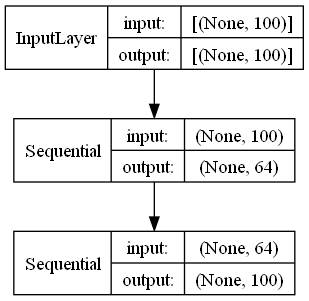

In [75]:
from keras.utils import plot_model

plot_model(autoencoder, to_file='autoencoder_model.png', show_shapes=True, show_layer_names=False)

In [76]:
print(X_test.shape)

(9800, 100)


In [77]:
############ Used for Testing TFLite model without functions ***************

# # Passing the full integer quantized TF Lite model to the interpreter.
# interpreter = tf.lite.Interpreter('AR_quantized.tflite')

# # Allocating tensors.
# interpreter.allocate_tensors()

# # Get input and output tensors.
# input_details = interpreter.get_input_details()
# output_details = interpreter.get_output_details()

# print(input_details)
# print(output_details)

# test_sample = X_test[0]
# test_sample = np.expand_dims(test_sample, axis=0)
# print(test_sample.shape)

# # Pre-processing the data to fit it with the model's input.
# input_data = np.array(test_sample, dtype=np.float32)
# # input_data = np.expand_dims(input_data, axis=-1)
# interpreter.set_tensor(input_details[0]['index'], input_data)

# # Run inference.
# interpreter.invoke()

# # Post-processing: remove batch dimension and find the digit with highest
# # probability.
# output_data = interpreter.get_tensor(output_details[0]['index'])
# # print(output_data)
# print(output_data.shape)

307/307 [==============================] - 1s 2ms/step
Threshold:  0.01079690292263054
1532/1532 [==============================] - 2s 2ms/step
Number of anomalies in healthy data: 2334 out of 49000 samples
Anomalies in normal data: 4.763265306122449 %
1532/1532 [==============================] - 2s 2ms/step
Number of anomalies in unhealthy data: 28658 out of 49000 samples
Anomalies in alternate data: 58.48571428571429 %


C:\Users\jared\AppData\Local\Temp\ipykernel_25956\3580450164.py:63: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


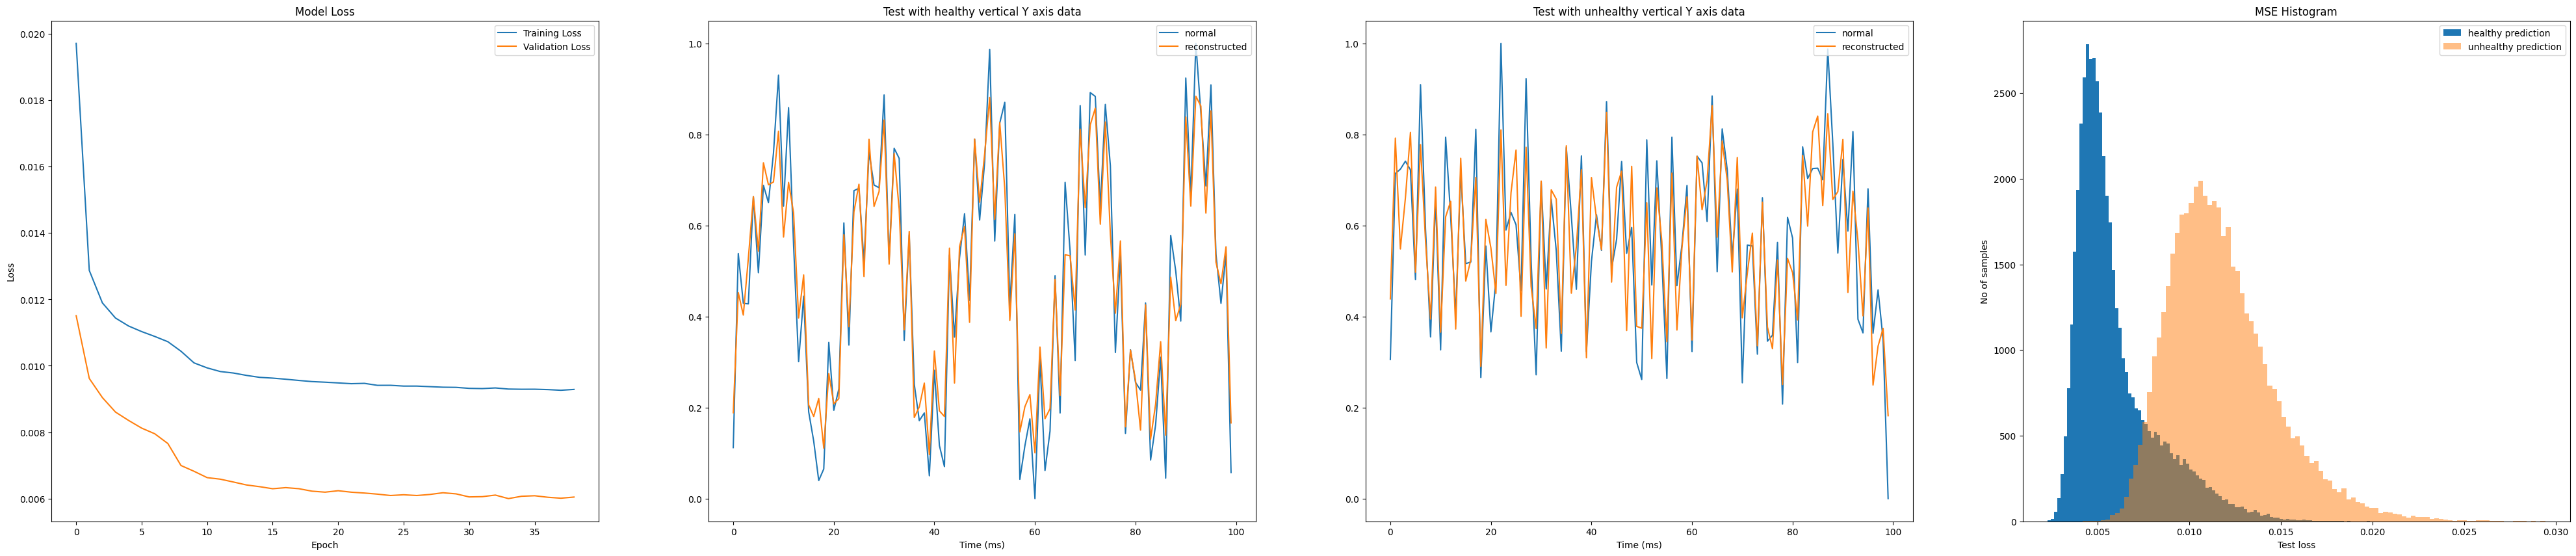

In [78]:
# Step 5: Evaluate the model
reconstructed_data = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructed_data, 2), axis = 1)

# Step 6: Set a threshold
threshold = np.percentile(mse, 95)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold: ", threshold)

fig, ax = plt.subplots(1, 4, figsize=(50, 10))

# Step 7: Anomaly detection
def is_anomaly(data, model, threshold, title, axpos):
    reconstructed_data = model.predict(data)
    
    ax[axpos].set_title(title)
    ax[axpos].plot(data[0, :], label='normal')
    ax[axpos].plot(reconstructed_data[0, :], label='reconstructed')
    ax[axpos].set_xlabel("Time (ms)")
    ax[axpos].legend(loc='upper right')
    
    mse = np.mean(np.power(data - reconstructed_data, 2), axis = 1)
    return mse > threshold, mse

# Plot training & validation loss values
ax[0].plot(history.history['loss'], label='Training Loss')
ax[0].plot(history.history['val_loss'], label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].legend(loc='upper right')

# Test with a new data point
count_norm = 0
healthy_data = data_healthy_vert_normalised[1]
unhealthy_data = data_unhealthy_vert_normalised[1]
anomalies_normal, mse_normal = is_anomaly(healthy_data, autoencoder, threshold, "Test with healthy vertical Y axis data", 1)

for i in anomalies_normal:
    if i == True:
        count_norm += 1
        
print("Number of anomalies in healthy data:", count_norm, "out of", anomalies_normal.size, "samples")
print("Anomalies in normal data:", (count_norm / anomalies_normal.size) * 100, "%")

# Test unhealthy data
anomalies_alternate, mse_alternate = is_anomaly(unhealthy_data, autoencoder, threshold, "Test with unhealthy vertical Y axis data", 2)

count_alternate = 0
for i in anomalies_alternate:
    if i == True:
        count_alternate += 1

print("Number of anomalies in unhealthy data:", count_alternate, "out of", anomalies_alternate.size, "samples")
print("Anomalies in alternate data:", (count_alternate / anomalies_alternate.size) * 100, "%")

# plot mse histogram
ax[3].set_title("MSE Histogram")
ax[3].hist(mse_normal, bins=100, label='healthy prediction')
ax[3].hist(mse_alternate, bins=100, label='unhealthy prediction', alpha=0.5)
ax[3].set_xlabel("Test loss")
ax[3].set_ylabel("No of samples")
ax[3].legend(loc='upper right')
fig.show()

In [79]:
print(X_test.shape)
print(reconstructed_data.shape)
print(healthy_data.shape)
print(unhealthy_data.shape)

(9800, 100)
(9800, 100)
(49000, 100)
(49000, 100)


In [80]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tinymlgen import port

from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential

# def representative_dataset():
#     for val in X_test:
#         # val = np.expand_dims(val, axis=0)
#         yield [np.array(val, dtype=np.float32)]

def representative_dataset():
    for data in tf.data.Dataset.from_tensor_slices(X_test).batch(1).take(1000):
        yield [tf.dtypes.cast(data, tf.float32)]

# Full integer quantization
fullint_converter = tf.lite.TFLiteConverter.from_keras_model(autoencoder)
fullint_converter.optimizations = [tf.lite.Optimize.DEFAULT]
fullint_converter.representative_dataset = representative_dataset
fullint_tflite_model = fullint_converter.convert()

# Save the models to disk
open("AR_model_fullint_quantized.tflite", "wb").write(fullint_tflite_model)


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmpo4mnn797\assets


INFO:tensorflow:Assets written to: C:\Users\jared\AppData\Local\Temp\tmpo4mnn797\assets
c:\Users\jared\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\lite\python\convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


37488

Need to run the following line on bash cmdline

"xxd -i AR_model_fullint_quantized.tflite > AR_model_fullint_quantized.cc"

In [81]:
# For Conv1D
# def evaluate_model(interpreter, dataset, threshold):
#     # Get input and output tensors.
#     input_details = interpreter.get_input_details()
#     output_details = interpreter.get_output_details()
#     num_test_samples = dataset.shape[0]

#     # Run predictions on every set in the "test" dataset.
#     reconstructed_data = []
#     for i in range(num_test_samples):

#         # Pre-processing the data to fit it with the model's input.
#         input_data = np.array(dataset[i], dtype=np.float32)
#         input_data = np.expand_dims(input_data, axis=0)
#         interpreter.set_tensor(input_details[0]['index'], input_data)

#         # Run inference.
#         interpreter.invoke()

#         # Post-processing: remove batch dimension and find the digit with highest
#         # probability.
#         output_data = interpreter.get_tensor(output_details[0]['index'])
#         reconstructed_data.append(output_data[0])

#     # Convert to numpy array from list for easier comparison
#     reconstructed_data = np.array(reconstructed_data)

#     mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=(1, 2))

#     anorm_count = 0
#     for i in range(len(mse)):
#         if mse[i] > threshold:
#             anorm_count += 1
    
#     return np.array(reconstructed_data), mse, anorm_count

# For Dense
def evaluate_model(interpreter, dataset, threshold):
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    num_test_samples = dataset.shape[0]
    # print("Dataset shape: ", dataset.shape)

    # Run predictions on every set in the "test" dataset.
    reconstructed_data = []
    for i in range(num_test_samples):

        # Pre-processing the data to fit it with the model's input.
        input_data = np.array(dataset[i], dtype=np.float32)
        # print("Input data shape:", input_data.shape)
        input_data = np.expand_dims(input_data, axis=0)
        # print("Input data shape after expand_dims:", input_data.shape)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference.
        interpreter.invoke()

        # Post-processing: remove batch dimension and find the digit with highest
        # probability.
        output_data = interpreter.get_tensor(output_details[0]['index'])
        reconstructed_data.append(output_data[0])

    # Convert to numpy array from list for easier comparison
    reconstructed_data = np.array(reconstructed_data)

    mse = np.mean(np.power(dataset - reconstructed_data, 2), axis=1)

    anorm_count = 0
    for i in range(num_test_samples):
        if mse[i] > threshold:
            anorm_count += 1
    
    return np.array(reconstructed_data), mse, anorm_count

In [82]:
# Processing data to pass into interpreter
# healthy_data = np.expand_dims(data_healthy_vert_normalised[1], axis=-1)
# unhealthy_data = np.expand_dims(data_unhealthy_vert_normalised[1], axis=-1)
healthy_data = data_healthy_vert_normalised[1]
unhealthy_data = data_unhealthy_vert_normalised[1]

# Passing the full integer quantized TF Lite model to the interpreter.
interpreter = tf.lite.Interpreter('AR_model_fullint_quantized.tflite')

# Allocating tensors.
interpreter.allocate_tensors()

recon_data_baseline, mse_baseline, anorm_count_baseline = evaluate_model(interpreter, X_test, threshold)

# Set a threshold
threshold = np.percentile(mse_baseline, 95)  # Set the threshold to the 95th percentile of the reconstruction errors
print("Threshold: ", threshold)

recon_data_healthy, mse_healthy, anorm_count_healthy = evaluate_model(interpreter, healthy_data, threshold)

# print(recon_data_healthy.shape)

print("Number of anomalies in healthy data:", anorm_count_healthy, "out of", healthy_data.shape[0], "samples")
print("Anomalies in normal data:", (anorm_count_healthy / healthy_data.shape[0]) * 100, "%")

recon_data_unhealthy, mse_unhealthy, anorm_count_unhealthy = evaluate_model(interpreter, unhealthy_data, threshold)

# print(recon_data_unhealthy.shape)

print("Number of anomalies in unhealthy data:", anorm_count_unhealthy, "out of", unhealthy_data.shape[0], "samples")
print("Anomalies in unhealthy data:", (anorm_count_unhealthy / unhealthy_data.shape[0]) * 100, "%")


Threshold:  0.010797927860699458
Number of anomalies in healthy data: 2360 out of 49000 samples
Anomalies in normal data: 4.816326530612245 %
Number of anomalies in unhealthy data: 28798 out of 49000 samples
Anomalies in unhealthy data: 58.77142857142857 %


In [87]:
# Getting data to csv to put on to Google sheets
sample_size = 10000

healthy_data_to_test = pd.DataFrame(healthy_data)
healthy_data_to_test = healthy_data_to_test.sample(n=sample_size)

unhealthy_data_to_test = pd.DataFrame(unhealthy_data)
unhealthy_data_to_test = unhealthy_data_to_test.sample(n=sample_size)

healthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARhealthydata.csv',index=False,header=False)
unhealthy_data_to_test.to_csv('C:/Users/jared/Desktop/TFLite_ARunhealthydata.csv',index=False,header=False)

Current to-dos:
* Find way to input test data into ESP32 main.cpp to test out model accuracy when deployed
* Need to test minimum size of tensor pool needed for the models to load properly